<a href="https://colab.research.google.com/github/Tania-Puc/Practica2_ECBD_U3_9B/blob/main/Regresi%C3%B3n_Lineal_Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
 
# Seleccionamos Tensorflow 2.0
try:
  # El comando %tensorflow_version solo existe en Colaboratory. Es un MAGIC COMMAND.
  %tensorflow_version 2.x
except Exception:
  pass
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/data.csv", header = 0)
data_frame.head()
data_frame.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
data_frame.drop('id', axis=1, inplace=True)
data_frame.drop('Unnamed: 32', axis=1, inplace=True)
data_frame['diagnosis'] = data_frame['diagnosis'].map({'M':1,'B':0})

In [ ]:
print(data_frame)
data_frame.describe()

     diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
features=list(data_frame.columns[1:11])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


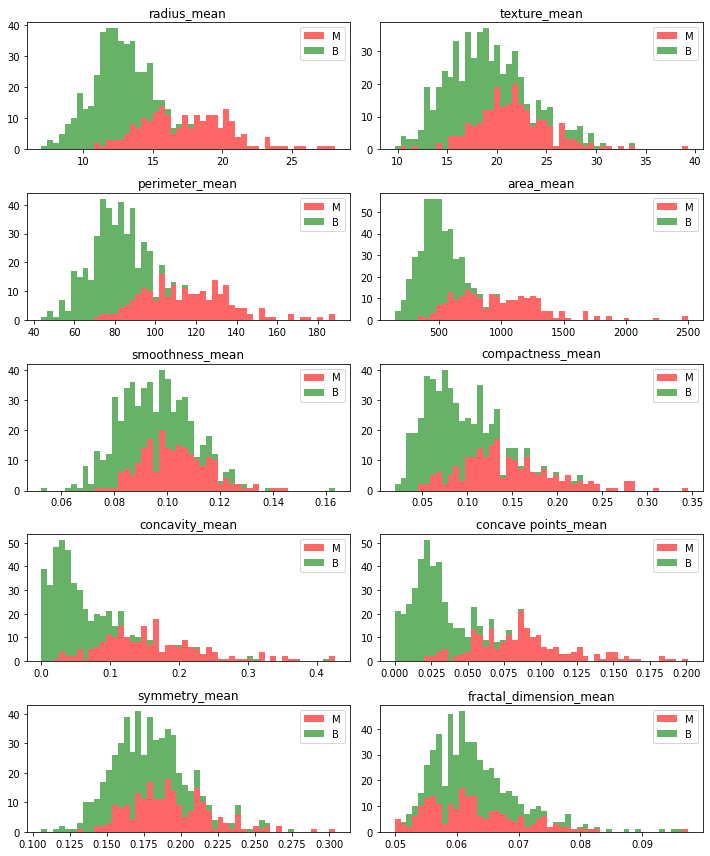

In [ ]:
mask = data_frame['diagnosis'] == 1
data_frame_M = data_frame[mask]
data_frame_B = data_frame[~mask]
 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.hist([data_frame_M[features[idx]],data_frame_B[features[idx]]], bins=50, alpha=0.6, stacked=True, label=['M','B'],color=['r','g'])
  ax.legend(loc='upper right')
  ax.set_title(features[idx])
plt.tight_layout()
plt.show()

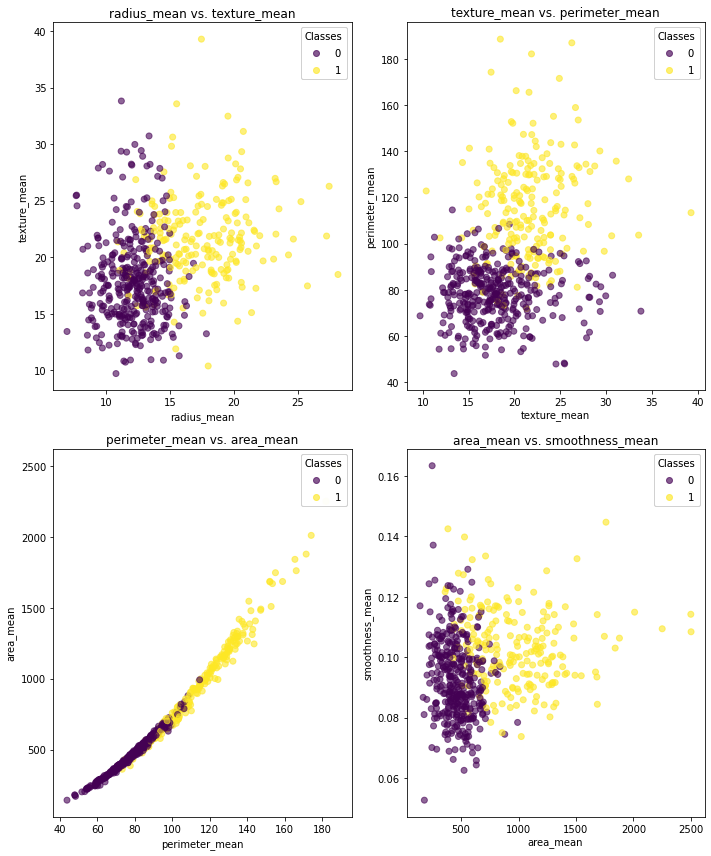

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  scatter = ax.scatter(data_frame[features[idx]], data_frame[features[idx+1]], c=data_frame['diagnosis'], alpha=0.6, label=['Color 1', 'Color 2'])
  ax.set_xlabel(features[idx])
  ax.set_ylabel(features[idx+1])
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.add_artist(legend1)
  ax.set_title(features[idx]+' vs. '+features[idx+1])
plt.tight_layout()
plt.show()

In [ ]:
X = data_frame[['radius_mean', 'area_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean']]
y = data_frame['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(1, input_dim = 5, kernel_initializer='zeros'))
model.add(layers.Activation('sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(0.00005), loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_history = model.fit(X_train.values, y_train.values, validation_data=(X_test, y_test), epochs = 150, batch_size=199)

Epoch 1/150
2/2 [==============================] - 1s 217ms/step - loss: 0.6920 - accuracy: 0.5101 - val_loss: 0.6899 - val_accuracy: 0.3743
Epoch 2/150
2/2 [==============================] - 0s 28ms/step - loss: 0.6886 - accuracy: 0.3719 - val_loss: 0.6878 - val_accuracy: 0.3743
Epoch 3/150
2/2 [==============================] - 0s 31ms/step - loss: 0.6863 - accuracy: 0.3719 - val_loss: 0.6865 - val_accuracy: 0.3743
Epoch 4/150
2/2 [==============================] - 0s 23ms/step - loss: 0.6851 - accuracy: 0.3719 - val_loss: 0.6859 - val_accuracy: 0.3743
Epoch 5/150
2/2 [==============================] - 0s 24ms/step - loss: 0.6839 - accuracy: 0.3719 - val_loss: 0.6854 - val_accuracy: 0.3743
Epoch 6/150
2/2 [==============================] - 0s 24ms/step - loss: 0.6834 - accuracy: 0.3719 - val_loss: 0.6848 - val_accuracy: 0.3743
Epoch 7/150
2/2 [==============================] - 0s 22ms/step - loss: 0.6825 - accuracy: 0.3719 - val_loss: 0.6838 - val_accuracy: 0.3743
Epoch 8/150
2/2 [==

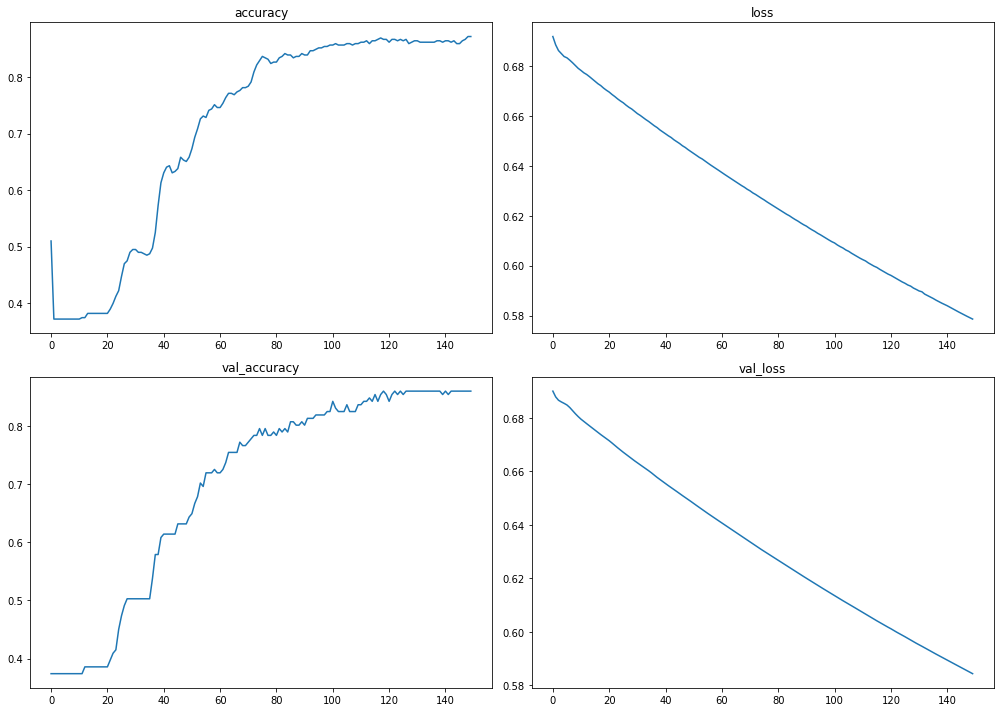

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes = axes.ravel()
outputs = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.plot(fit_history.history[outputs[idx]])
  ax.set_title(outputs[idx])
plt.tight_layout()
plt.show()

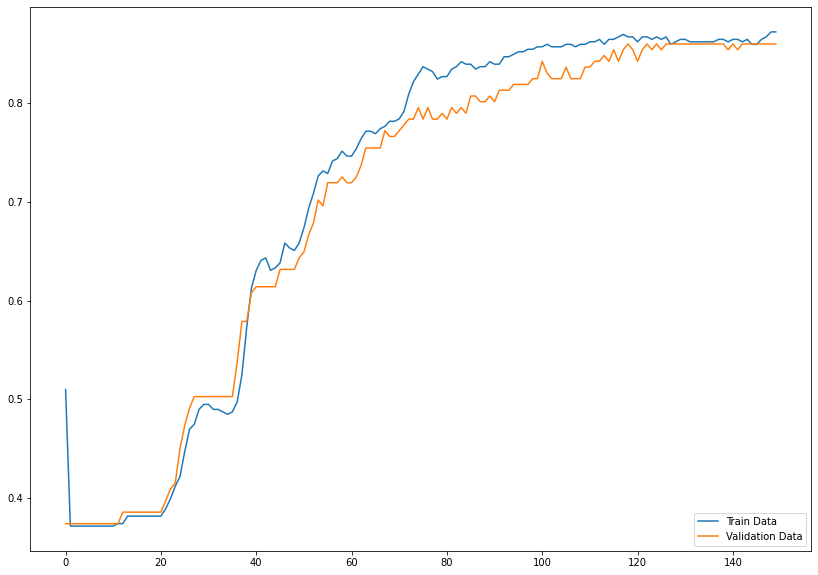

In [ ]:
plt.figure(figsize=(14,10), facecolor='w')
plt.plot(fit_history.history['accuracy'], label='Train Data')
plt.plot(fit_history.history['val_accuracy'], label='Validation Data')
plt.legend()
plt.legend(loc='lower right')


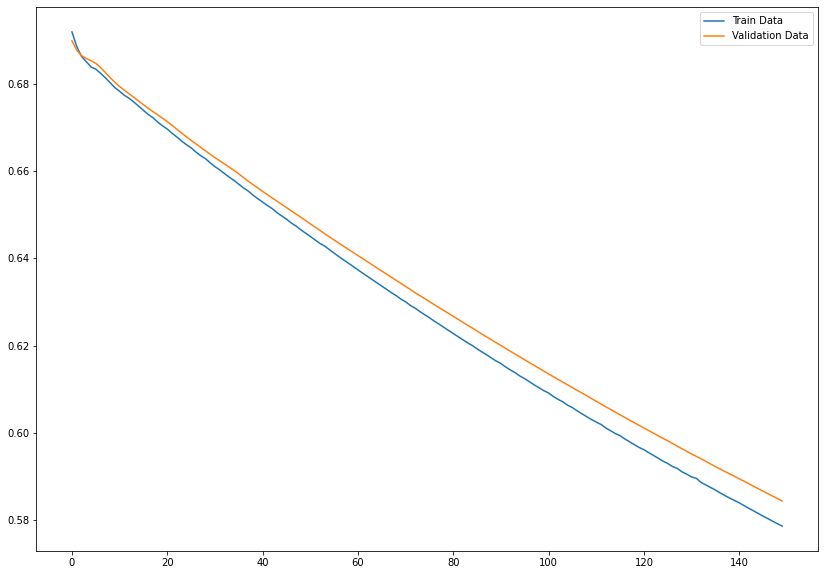

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(fit_history.history['loss'], label='Train Data')
plt.plot(fit_history.history['val_loss'], label='Validation Data')
plt.legend()
plt.legend(loc='upper right')


In [ ]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8596


[0.584342896938324, 0.859649121761322]

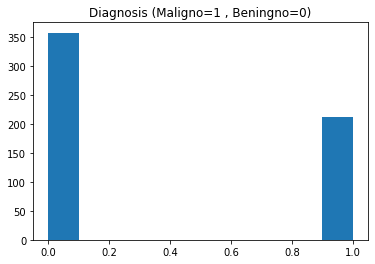

In [ ]:
data_frame.describe()
plt.hist(data_frame['diagnosis'])
plt.title('Diagnosis (Maligno=1 , Beningno=0)')
plt.show()